# CUSTOMER SEGMENTATION WITH KMEANS CLUSTERING

Clustering is used in a wide variety of applications, including customer segmentation. You can cluster your customers based on their purchases, demography, geographical information, behavioral information, their activity on your website, and so on. This is useful to understand who your customers are and what they need, so you can adapt your products and marketing campaigns to each segment. For example, this can be useful in recommender systems to suggest content that other users in the same cluster enjoyed.

The most common ways in which businesses segment their customer base are:

-  Demographic information, such as gender, age, familial and marital status, income, education, and occupation.
-  Geographical information, which differs depending on the scope of the company. For localized businesses, this info might pertain to specific towns or counties. For larger companies, it might mean a customer’s city, state, or even country of residence.
- Psychographics, such as social class, lifestyle, and personality traits.
- Behavioral data, such as spending and consumption habits, product/service usage, and desired benefits.


Advantages of Customer Segmentation
- Determine appropriate product pricing.
- Develop customized marketing campaigns.
- Design an optimal distribution strategy.
- Choose specific product features for deployment.
- Prioritize new product development efforts.

References:

analyticsvidhya.com/blog/2021/05/k-means-clustering-with-mall-customer-segmentation-data-full-detailed-code-and-explanation/
 
https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3#:~:text=The%20goal%20of%20K%20means,the%20revenue%20of%20the%20company.

# CUSTOMER SEGMENTATION - TRANSACTIONAL ACTIVITY

### Data Set Information:

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


### Attribute Information:

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.


StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.


Description: Product (item) name. Nominal.


Quantity: The quantities of each product (item) per transaction. Numeric.


InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.


UnitPrice: Unit price. Numeric, Product price per unit in sterling.


CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.


Country: Country name. Nominal, the name of the country where each customer resides.

## Aim:
Cluster customers based on their RFM(Recency, Frequency, Monetary) scores. RFM scores are a way of analyzing customer behavior and segmenting customers based on their purchasing behavior. RFM stands for Recency, Frequency, and Monetary, which are the three key metrics used to calculate the RFM scores.

- Recency (R): This metric measures how recently a customer has made a purchase. Customers who have made a purchase more recently are considered to be more engaged with the business and are often more likely to make another purchase.

- Frequency (F): This metric measures how frequently a customer has made a purchase. Customers who have made more purchases are often more loyal to the business and are more likely to make repeat purchases.

- Monetary (M): This metric measures the total amount of money that a customer has spent on purchases. Customers who have spent more money are often more valuable to the business and may be targeted with higher-value offers.

To calculate RFM scores, we first calculate the recency, frequency, and monetary value for each customer, and then score each customer on each metric based on their relative position compared to other customers. For example, we might score customers on recency based on how recently they made a purchase, with the most recent customers getting a score of 5 and the least recent customers getting a score of 1. We would then do the same for frequency and monetary value.

Once we have scored customers on each metric, we can combine the scores to create an overall RFM score. For example, a customer who has a recency score of 5, a frequency score of 4, and a monetary score of 3 would have an overall RFM score of 543. We can then use these scores to segment customers into different groups based on their purchasing behavior and target them with customized marketing campaigns or other strategies.

### Data Source: https://archive.ics.uci.edu/ml/datasets/online+retail#

In [56]:
import matplotlib.pyplot as plt
from glob import glob #library that helps us search for files
import scipy
import random

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from category_encoders import OneHotEncoder,TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold,StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, PowerTransformer,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.feature_selection import RFE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.cluster import KMeans

import warnings
warnings.simplefilter(action="ignore")
pd.pandas.set_option('display.max_rows',None)
pd.pandas.set_option('display.max_columns',None)
from sklearn.feature_selection import VarianceThreshold
#pd.options.display.float_format = '{:20,.2f}'.format
sns.set(style = 'whitegrid')


In [57]:
df = pd.read_excel('/Users/USER/Documents/DATASETS/OnlineRetail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [58]:
df.shape

(541909, 8)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## EMPTY STRINGS

In [60]:
#columns
[i for i in df.columns if i.endswith(' ') or i.startswith(' ')]

[]

In [61]:
#rows
for i in df.columns:
    print(df[df[i] == ' '])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
In

## CARDINALITY

In [62]:
for i in df.select_dtypes('O').columns:
    print(i.upper())
    print(f'Number of unique values in {i}:',df[i].nunique())
    print(f'Unique values in {i}:', df[i].unique())
    print()

INVOICENO
Number of unique values in InvoiceNo: 25900
Unique values in InvoiceNo: [536365 536366 536367 ... 581585 581586 581587]

STOCKCODE
Number of unique values in StockCode: 4070
Unique values in StockCode: ['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]

DESCRIPTION
Number of unique values in Description: 4223
Unique values in Description: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']

COUNTRY
Number of unique values in Country: 38
Unique values in Country: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'E

In [63]:
for i in df.select_dtypes('O').columns:
    print(i.upper())
    print(f' Frequency of cardinality in {i}:',df[i].value_counts(normalize=True))
    print()

INVOICENO
 Frequency of cardinality in InvoiceNo: 573585     0.002056
581219     0.001382
581492     0.001349
580729     0.001330
558475     0.001301
579777     0.001268
581217     0.001247
537434     0.001246
580730     0.001222
538071     0.001203
580367     0.001199
580115     0.001190
581439     0.001172
580983     0.001161
578344     0.001148
538349     0.001144
578347     0.001118
537638     0.001109
537237     0.001102
536876     0.001094
576617     0.001094
536592     0.001092
537823     0.001091
576837     0.001080
579508     0.001067
577078     0.001056
537240     0.001048
577358     0.001035
576618     0.001019
576840     0.001004
576339     0.001000
579187     0.000998
537666     0.000989
538177     0.000985
579196     0.000984
580727     0.000976
536544     0.000972
578844     0.000972
575930     0.000971
577768     0.000971
578827     0.000960
576329     0.000956
575176     0.000956
539437     0.000956
575477     0.000950
539958     0.000945
575875     0.000928
579512    

 Frequency of cardinality in Country: United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
Unite

<AxesSubplot:>

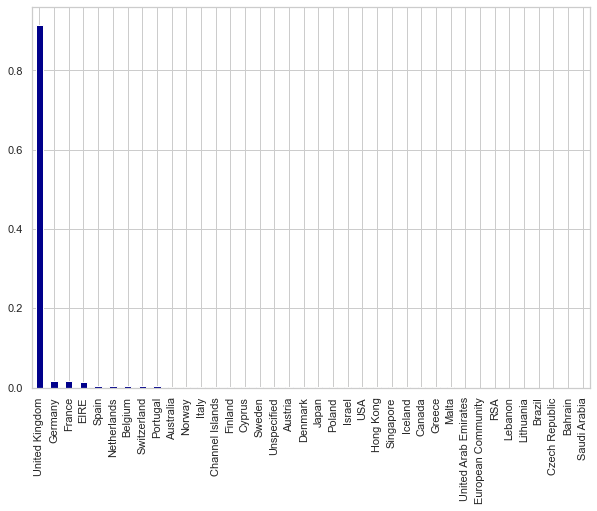

In [64]:
plt.figure(figsize=(10,7))
df['Country'].value_counts(normalize=True).sort_values(ascending=False).plot.bar(color='darkblue')

In [65]:
#creating new column
df['Total_Purchase'] = df['Quantity'] * df['UnitPrice']

## NULL VALUES

In [66]:
df.isnull().sum()

InvoiceNo              0
StockCode              0
Description         1454
Quantity               0
InvoiceDate            0
UnitPrice              0
CustomerID        135080
Country                0
Total_Purchase         0
dtype: int64

In [67]:
df.isnull().mean()*100

InvoiceNo          0.000000
StockCode          0.000000
Description        0.268311
Quantity           0.000000
InvoiceDate        0.000000
UnitPrice          0.000000
CustomerID        24.926694
Country            0.000000
Total_Purchase     0.000000
dtype: float64

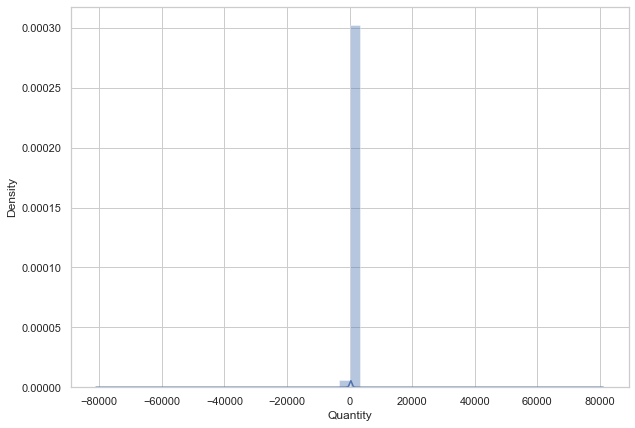

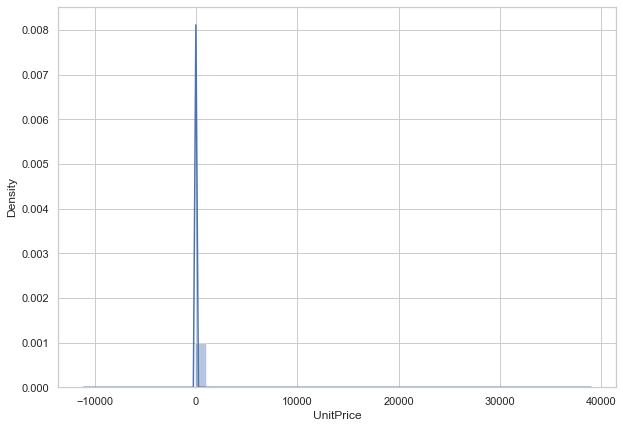

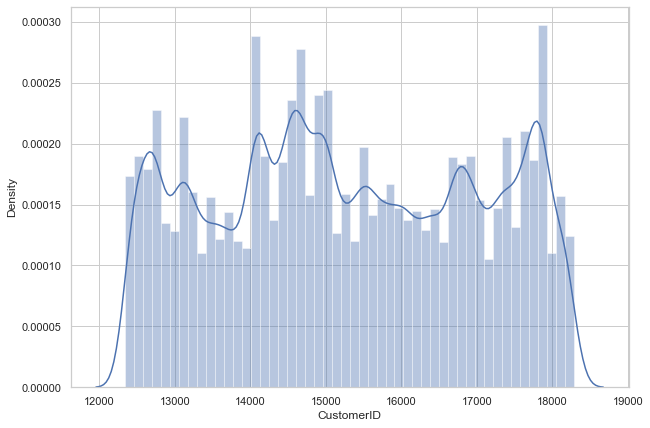

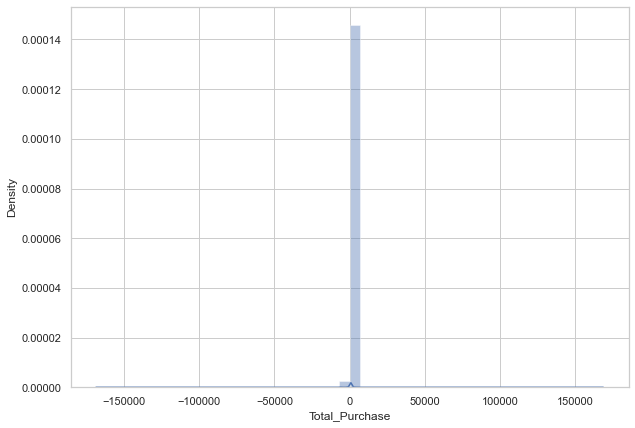

In [68]:
for i in df.select_dtypes('number').columns:
    plt.figure(figsize=(10,7))
    sns.distplot(df[i])

In [69]:
df.describe()

,Quantity,UnitPrice,CustomerID,Total_Purchase
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795
std,218.081158,96.759853,1713.600303,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [70]:
# dealing with null values via CCA 
df = df.dropna()

In [71]:
# removing cancelled transactions
def c(x):
    x = str(x)
    if x.startswith('C') or x.startswith('c'):
        return 'C'
    else:
        return 'S'
    
df['InvoiceNo'].apply(c).value_counts()

S    397924
C      8905
Name: InvoiceNo, dtype: int64

In [72]:
df['Cancel'] = df['InvoiceNo'].apply(c)

In [73]:
df[df['Cancel'] == 'C'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Purchase,Cancel
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,C
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,C
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,C
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,C
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,C


In [74]:
to_drop = df[df['Cancel'] == 'C'].index

In [75]:
df = df.drop(to_drop, axis=0)#dropping canceled orders

## Feature engineering after dropping canceled transactions

In [76]:
rfm = pd.DataFrame(columns = ['Recency', 'Frequency', 'Monetary'])
rfm['Monetary'] = df.groupby('CustomerID')['Total_Purchase'].sum()
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,NaN,NaN,77183.60
12347.0,NaN,NaN,4310.00
12348.0,NaN,NaN,1797.24
12349.0,NaN,NaN,1757.55
12350.0,NaN,NaN,334.40


In [77]:
#Recency
rfm['Recency'] = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days})

In [78]:
#Frequency
rfm['Frequency'] = df.groupby('CustomerID')['InvoiceNo'].nunique()

In [79]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40


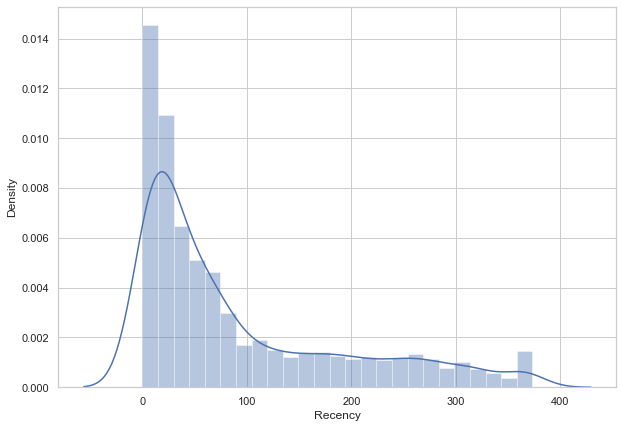

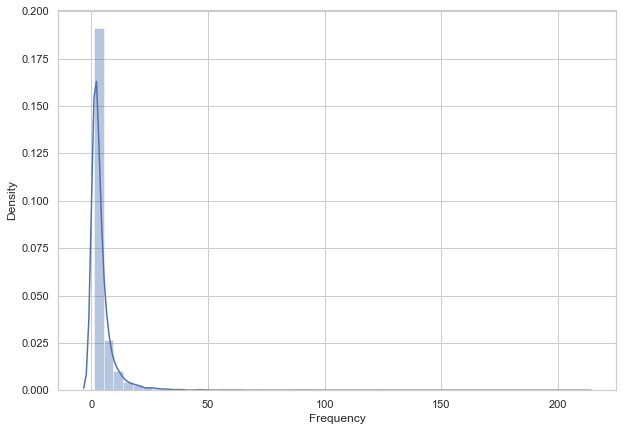

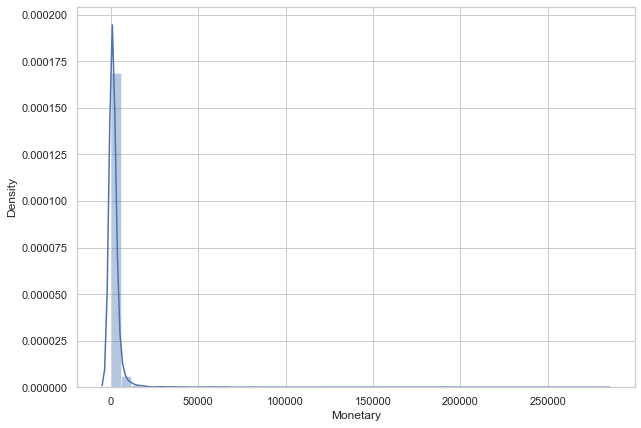

In [80]:
for i in rfm.select_dtypes('number').columns:
    plt.figure(figsize=(10,7))
    sns.distplot(rfm[i])

In [81]:
rfm.describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,91.518322,4.271952,2053.793018
std,100.009747,7.705493,8988.248381
min,0.000000,1.000000,0.000000
25%,17.000000,1.000000,307.245000
50%,50.000000,2.000000,674.450000
75%,141.000000,5.000000,1661.640000
max,373.000000,210.000000,280206.020000


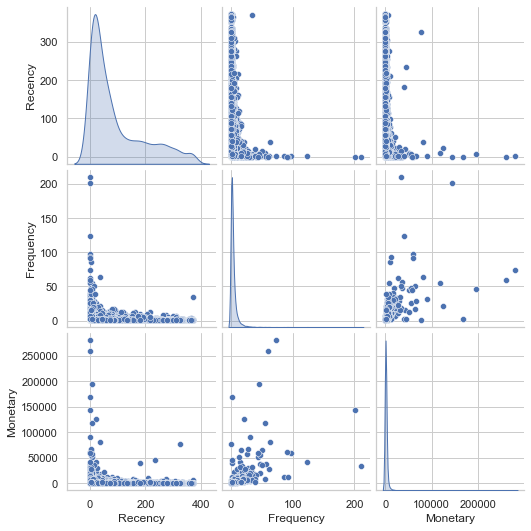

In [82]:
sns.pairplot(rfm, diag_kind='kde');

In [83]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(rfm)

## OPTIMAL NUMBER OF CLUSTERS
The KMEans algorithm is very sensitive to the number of clusters, setting a bad number might lead to a terrible solution. Knowing the number of clusters is not always easy or obvious at first glance. There are two main methods used to determine this: Elbow Curve Method and Silhouette coefficient. Rather than using the elbow method, a more optimal solution is to use the silhouette coefficient. It varies from -1 to +1. A coefficient close to:

+1 means an instance is well inside its cluster and far from other centroids,
0 means it is close to a cluster boundary
-1 means the instance might have been assigned to the wrong cluster.

## ELBOW CURVE METHOD
In this method, we pick a range of possible clusters and compute the WCSS for each cluster number and represent it in a plot

In [84]:
wcss = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i)
    clusters = kmeans.fit_predict(df_scaled)
    inertia = kmeans.inertia_
    wcss.append(inertia)

Text(0, 0.5, 'WCSS')

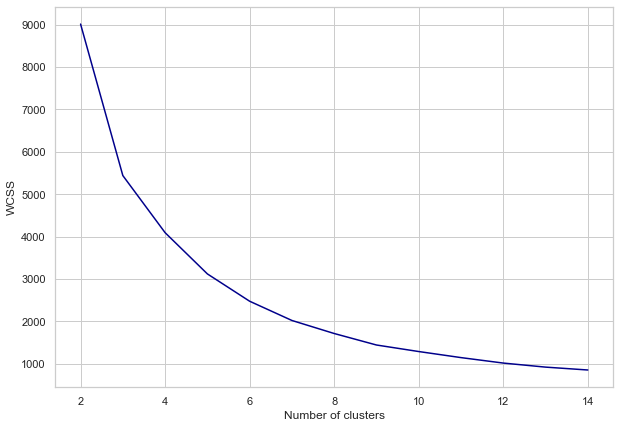

In [85]:
#plotting elbow curve
plt.figure(figsize=(10,7))
plt.plot(range(2, 15), wcss, color = 'darkblue')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## SILHOUETTE COEFFICIENT
The silhouette coefficient is a measure of how similar a data points is within cluster(cohesion) compared to other clusters(separation)

In [86]:
from sklearn.metrics import silhouette_score

In [87]:
scores = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters= i)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    scores.append(score)

Text(0, 0.5, 'Silhouette score')

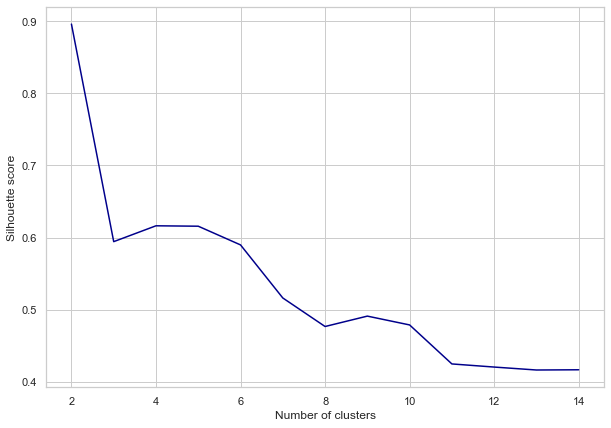

In [88]:
plt.figure(figsize=(10,7))
plt.plot(range(2, 15), scores, color = 'darkblue')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

## CLUSTERING

In [89]:
kmeans = KMeans(n_clusters = 4)
clusters = kmeans.fit_predict(df_scaled)

In [90]:
customers = pd.DataFrame(df_scaled, columns = rfm.columns)
customers['Clusters'] = clusters
customers.head()

,Recency,Frequency,Monetary,Clusters
0,2.334858,-0.424675,8.359634,0
1,-0.905199,0.354080,0.251046,3
2,-0.175186,-0.035297,-0.028546,3
3,-0.735196,-0.424675,-0.032963,3
4,2.174855,-0.424675,-0.191315,1


In [91]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.76915916,  2.30158008,  1.15369729],
       [ 1.56146094, -0.35311161, -0.17531557],
       [-0.8513522 , 10.17837486, 13.94030906],
       [-0.48561439, -0.08044626, -0.07854505]])

In [92]:
kmeans.labels_

array([0, 3, 3, ..., 3, 0, 3])

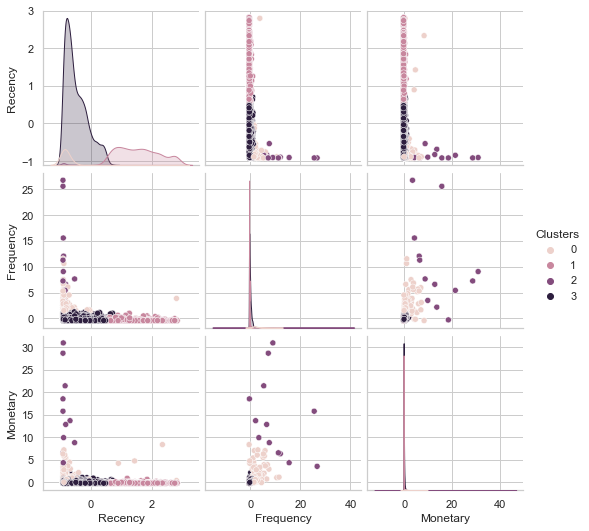

In [93]:
sns.pairplot(customers, hue = 'Clusters', diag_kind='kde')

# CUSTOMER SEGMENTATION- DEMOGRAPHY

### Problem Statement
You own a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on defined parameters like customer behavior and purchasing data. The aim of this project is to understand the customers you have and know which group will respond better to a marketing strategy[Target Customers].

## Data Source: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?resource=download

In [110]:
df = pd.read_csv('/Users/USER/Documents/DATASETS/Mall_Customers.csv', index_col=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [95]:
df.shape

(200, 4)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


<AxesSubplot:xlabel='Gender', ylabel='count'>

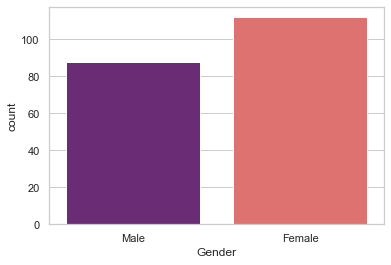

In [97]:
sns.countplot(data =df, x ='Gender', palette = 'magma')

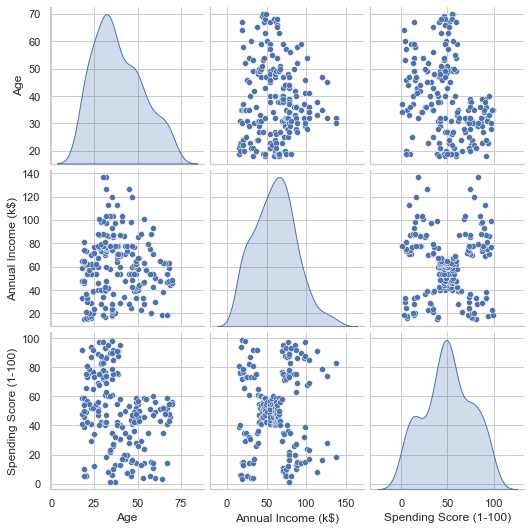

In [98]:
sns.pairplot(df, diag_kind='kde', palette = 'magma')

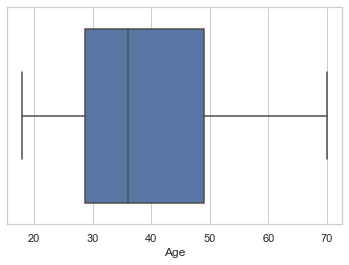

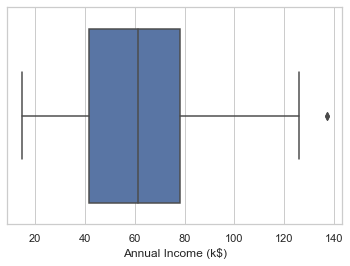

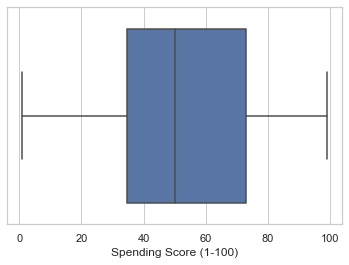

In [99]:
for i in df.select_dtypes('number').columns:
    plt.figure()
    sns.boxplot(data=df, x =i)

In [100]:
for i in df.select_dtypes('number').columns:
    print(f'{i.upper()}:', df[i].max() - df[i].min())

AGE: 52
ANNUAL INCOME (K$): 122
SPENDING SCORE (1-100): 98


scaler = StandardScaler()

num = df.select_dtypes('number').columns
df[num] = scaler.fit_transform(df[num])

In [111]:
le = LabelEncoder()

cat = df.select_dtypes('O').columns
df[cat] = le.fit_transform(df[cat])

In [112]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


## ELBOW CURVE

In [113]:
wcss = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(df)
    inertia = kmeans.inertia_
    wcss.append(inertia)

Text(0, 0.5, 'WCSS')

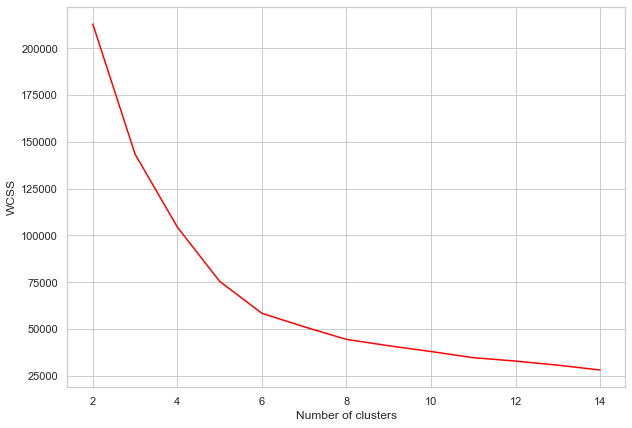

In [114]:
plt.figure(figsize=(10,7))
plt.plot(range(2, 15), wcss, color = 'red')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## SILHOUETTE SCORE

In [115]:
si_scores = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, kmeans.labels_)
    si_scores.append(score)

Text(0, 0.5, 'Silhouette score')

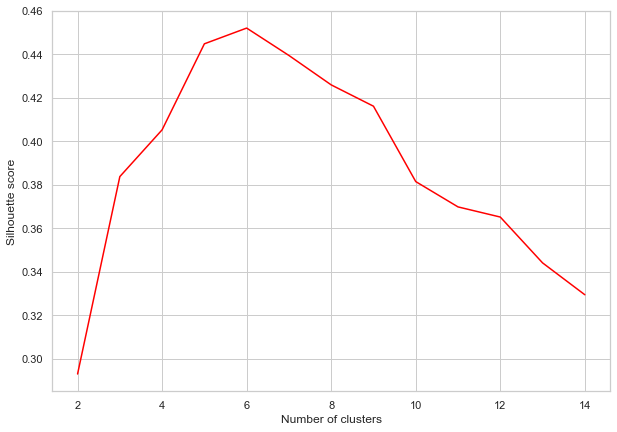

In [116]:
plt.figure(figsize=(10,7))

plt.plot(range(2, 15), si_scores, color = 'red')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

## CLUSTERING

In [117]:
kmeans = KMeans(n_clusters= 6)
clusters = kmeans.fit_predict(df)

df['Clusters'] = clusters

<Figure size 1440x1440 with 0 Axes>

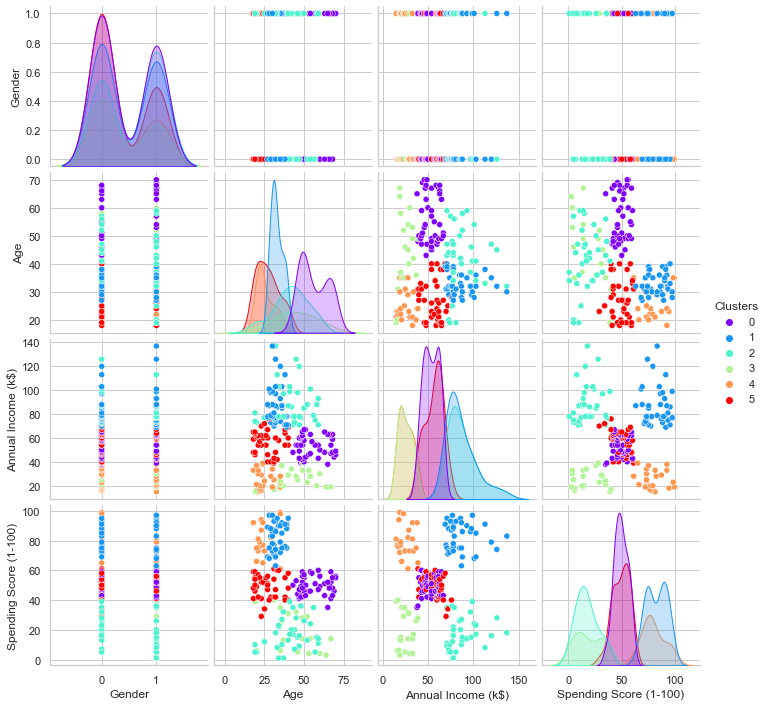

In [118]:
plt.figure(figsize=(20,20))

sns.pairplot(df, hue = 'Clusters', palette='rainbow', diag_kind='kde')

# 3D REPRESENTATION OF CLUSTERS

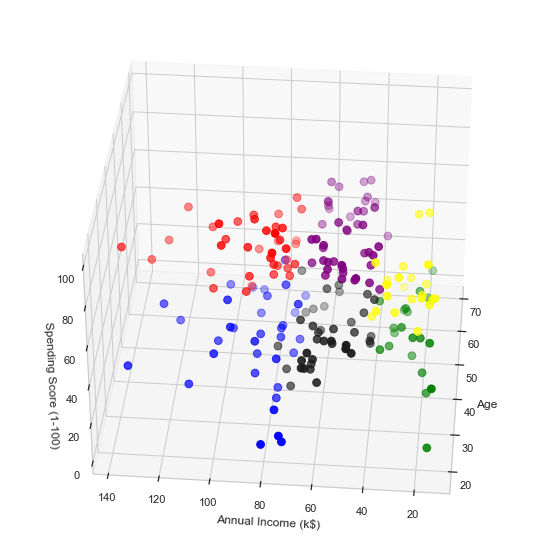

In [122]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.Age[df.Clusters == 0], df["Annual Income (k$)"][df.Clusters == 0], df["Spending Score (1-100)"][df.Clusters == 0], c='purple', s=60)
ax.scatter(df.Age[df.Clusters == 1], df["Annual Income (k$)"][df.Clusters == 1], df["Spending Score (1-100)"][df.Clusters == 1], c='red', s=60)
ax.scatter(df.Age[df.Clusters == 2], df["Annual Income (k$)"][df.Clusters == 2], df["Spending Score (1-100)"][df.Clusters == 2], c='blue', s=60)
ax.scatter(df.Age[df.Clusters == 3], df["Annual Income (k$)"][df.Clusters == 3], df["Spending Score (1-100)"][df.Clusters == 3], c='green', s=60)
ax.scatter(df.Age[df.Clusters == 4], df["Annual Income (k$)"][df.Clusters == 4], df["Spending Score (1-100)"][df.Clusters == 4], c='yellow', s=60)
ax.scatter(df.Age[df.Clusters == 5], df["Annual Income (k$)"][df.Clusters == 5], df["Spending Score (1-100)"][df.Clusters == 5], c='k', s=60)
ax.scatter(df.Age[df.Clusters == 6], df["Annual Income (k$)"][df.Clusters == 6], df["Spending Score (1-100)"][df.Clusters == 6], c='darkblue', s=60)


ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()
